In [1]:
#INSTALLED DEPENDENCIES

!pip install tensorflow keras numpy matplotlib opencv-python kaggle


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [5]:
import zipfile
import os

zip_path = "/content/sample_data/archive (7).zip"  # adjust this to your uploaded filename
extract_path = "/content/cats_and_dogs"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Check contents
os.listdir(extract_path)


['test', 'train']

In [6]:
base_dir = '/content/cats_and_dogs'  # e.g., 'cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')

In [7]:
# Image Data Generator with Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
# Flow training images in batches
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [9]:
# CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # binary classification
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train model
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=50
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
 28/100 ━━━━━━━━━━━━━━━━━━━━ 1:23 1s/step - accuracy: 0.4804 - loss: 0.7666

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 347ms/step - accuracy: 0.4861 - loss: 0.7395 - val_accuracy: 0.5571 - val_loss: 0.6926
Epoch 2/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 344ms/step - accuracy: 0.4760 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 339ms/step - accuracy: 0.4971 - loss: 0.6931 - val_accuracy: 0.4929 - val_loss: 0.6925
Epoch 4/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 392ms/step - accuracy: 0.4911 - loss: 0.6931 - val_accuracy: 0.5357 - val_loss: 0.6920
Epoch 5/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 366ms/step - accuracy: 0.5598 - loss: 0.6845 - val_accuracy: 0.6214 - val_loss: 0.6756
Epoch 6/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 387ms/step - accuracy: 0.5515 - loss: 0.6848 - val_accuracy: 0.5357 - val_loss: 0.6912
Epoch 7/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 369ms/step - accuracy: 0.5829 - loss: 0.6830 - val_accuracy: 0.5000 - val_loss: 0.7589
Epoch 8/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 341ms/step - accuracy: 0.5809 - loss: 0.6861 - val

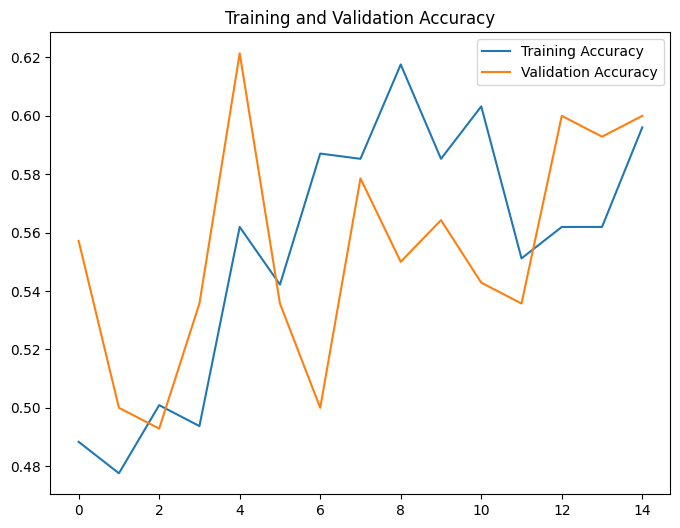

In [11]:
# Plot accuracy/loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 6))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


<ipython-input-15-6a327f304d66>:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class = class_names[int(prediction[0] > 0.5)]


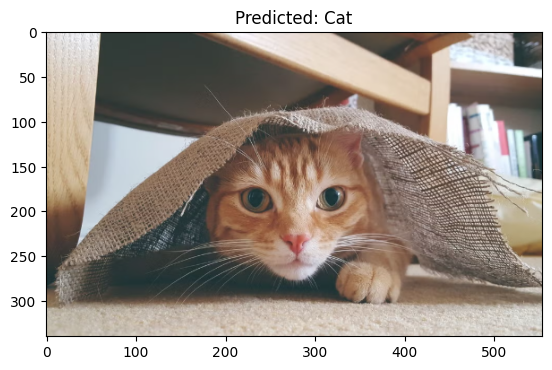

In [15]:
from tensorflow.keras.preprocessing import image

# Replace with the path to a test image
img_path = '/content/imgtest.png'
# Changed target_size to (150, 150) to match the input shape of the model
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict the class
prediction = model.predict(img_array)
class_names = ['Cat', 'Dog']  # Adjust based on your training labels
predicted_class = class_names[int(prediction[0] > 0.5)]

plt.imshow(image.load_img(img_path))
plt.title(f"Predicted: {predicted_class}")
plt.show()